In [45]:
# Modul dan Package yang Digunakan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

from scipy.stats import gaussian_kde
from scipy.stats import norm, chi2
from scipy.special import comb

"DONE!!"

'DONE!!'

# Import Data dan Persiapan

In [46]:
try:
    df = pd.read_csv('https://raw.githubusercontent.com/Jepees/ADK-Dani/refs/heads/main/Dataset/Planes.csv')
except:
    df = pd.read_csv("D:/DANIs D/KULIAH/Semester 5/Analisis Data Kategorik/TUGAS/Dataset/Planes.csv")
df.head().transpose()

,0,1,2,3,4
id,19556,90035,12360,77959,36875
Gender,Female,Female,Male,Male,Female
Customer Type,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer,Loyal Customer
Age,52,36,20,44,49
Type of Travel,Business travel,Business travel,Business travel,Business travel,Business travel
Class,Eco,Business,Eco,Business,Eco
Flight Distance,160,2863,192,3377,1182
Inflight wifi service,5,1,2,0,2
Departure/Arrival time convenient,4,1,0,0,3
Ease of Online booking,3,3,2,0,4


In [47]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,25976.0,NaN,NaN,NaN,65005.657992,37611.526647,17.0,32170.5,65319.5,97584.25,129877.0
Gender,25976,2,Female,13172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,25976,2,Loyal Customer,21177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,25976.0,NaN,NaN,NaN,39.620958,15.135685,7.0,27.0,40.0,51.0,85.0
Type of Travel,25976,2,Business travel,18038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,25976,3,Business,12495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,25976.0,NaN,NaN,NaN,1193.788459,998.683999,31.0,414.0,849.0,1744.0,4983.0
Inflight wifi service,25976.0,NaN,NaN,NaN,2.724746,1.335384,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,25976.0,NaN,NaN,NaN,3.046812,1.533371,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,25976.0,NaN,NaN,NaN,2.756775,1.412951,0.0,2.0,3.0,4.0,5.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [49]:
for kolom in df.columns:
    kosong = df[kolom].isnull().sum()
    if kosong > 0:
        print(f'{kolom}: {kosong}')

Arrival Delay in Minutes: 83


In [50]:
df.fillna(0, inplace=True)
for kolom in df.columns:
    kosong = df[kolom].isnull().sum()
    if kosong > 0:
        print(f'{kolom}: {kosong}')
print('tak ada yang kosong')

tak ada yang kosong


In [51]:
#dibuat sesuai Proposal

Target = ['satisfaction']
kategorik = ['Gender', 'Type of Travel', 'Class', 'Inflight wifi service', 'Inflight entertainment']
numerik = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [52]:
df = df[Target + numerik + kategorik ]
df.describe(include='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   satisfaction                25976 non-null  object 
 1   Age                         25976 non-null  int64  
 2   Flight Distance             25976 non-null  int64  
 3   Departure Delay in Minutes  25976 non-null  int64  
 4   Arrival Delay in Minutes    25976 non-null  float64
 5   Gender                      25976 non-null  object 
 6   Type of Travel              25976 non-null  object 
 7   Class                       25976 non-null  object 
 8   Inflight wifi service       25976 non-null  int64  
 9   Inflight entertainment      25976 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 2.0+ MB


In [53]:
df.describe(include='all')

,satisfaction,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Type of Travel,Class,Inflight wifi service,Inflight entertainment
count,25976,25976.000000,25976.000000,25976.00000,25976.000000,25976,25976,25976,25976.000000,25976.000000
unique,2,NaN,NaN,NaN,NaN,2,2,3,NaN,NaN
top,neutral or dissatisfied,NaN,NaN,NaN,NaN,Female,Business travel,Business,NaN,NaN
freq,14573,NaN,NaN,NaN,NaN,13172,18038,12495,NaN,NaN
mean,NaN,39.620958,1193.788459,14.30609,14.693756,NaN,NaN,NaN,2.724746,3.357753
std,NaN,15.135685,998.683999,37.42316,37.466787,NaN,NaN,NaN,1.335384,1.338299
min,NaN,7.000000,31.000000,0.00000,0.000000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,27.000000,414.000000,0.00000,0.000000,NaN,NaN,NaN,2.000000,2.000000
50%,NaN,40.000000,849.000000,0.00000,0.000000,NaN,NaN,NaN,3.000000,4.000000
75%,NaN,51.000000,1744.000000,12.00000,13.000000,NaN,NaN,NaN,4.000000,4.000000


# EDA

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   satisfaction                25976 non-null  object 
 1   Age                         25976 non-null  int64  
 2   Flight Distance             25976 non-null  int64  
 3   Departure Delay in Minutes  25976 non-null  int64  
 4   Arrival Delay in Minutes    25976 non-null  float64
 5   Gender                      25976 non-null  object 
 6   Type of Travel              25976 non-null  object 
 7   Class                       25976 non-null  object 
 8   Inflight wifi service       25976 non-null  int64  
 9   Inflight entertainment      25976 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 2.0+ MB


In [55]:
df['Inflight wifi service'] = df['Inflight wifi service'].astype("category")
df['Inflight entertainment'] = df['Inflight entertainment'].astype("category")

C:\Users\Dell\AppData\Local\Temp\ipykernel_17668\1578947293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='satisfaction', palette='viridis')


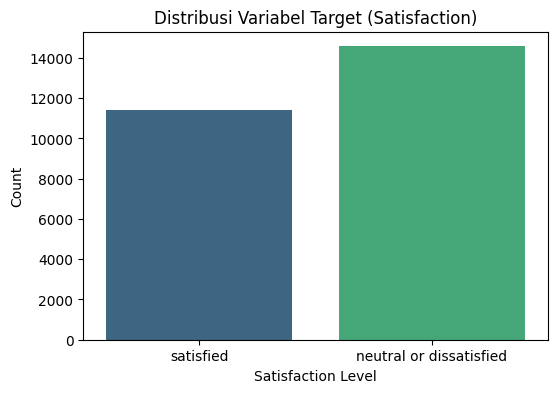

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.00000,25976.000000
mean,39.620958,1193.788459,14.30609,14.693756
std,15.135685,998.683999,37.42316,37.466787
min,7.000000,31.000000,0.00000,0.000000
25%,27.000000,414.000000,0.00000,0.000000
50%,40.000000,849.000000,0.00000,0.000000
75%,51.000000,1744.000000,12.00000,13.000000
max,85.000000,4983.000000,1128.00000,1115.000000


In [56]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='satisfaction', palette='viridis')
plt.title('Distribusi Variabel Target (Satisfaction)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()

# Melihat distribusi variabel numerik
df[numerik].describe()

In [57]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64

In [58]:
a = df[df['Arrival Delay in Minutes']<=60]
a = a[a['Departure Delay in Minutes'] <= 60]
a

,satisfaction,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Type of Travel,Class,Inflight wifi service,Inflight entertainment
0,satisfied,52,160,50,44.0,Female,Business travel,Eco,5,5
1,satisfied,36,2863,0,0.0,Female,Business travel,Business,1,4
2,neutral or dissatisfied,20,192,0,0.0,Male,Business travel,Eco,2,2
3,satisfied,44,3377,0,6.0,Male,Business travel,Business,0,1
4,satisfied,49,1182,0,20.0,Female,Business travel,Eco,2,2
...,...,...,...,...,...,...,...,...,...,...
25971,neutral or dissatisfied,34,526,0,0.0,Male,Business travel,Business,3,4
25972,satisfied,23,646,0,0.0,Male,Business travel,Business,4,4
25973,neutral or dissatisfied,17,828,0,0.0,Female,Personal Travel,Eco,2,2
25974,satisfied,14,1127,0,0.0,Male,Business travel,Business,3,4


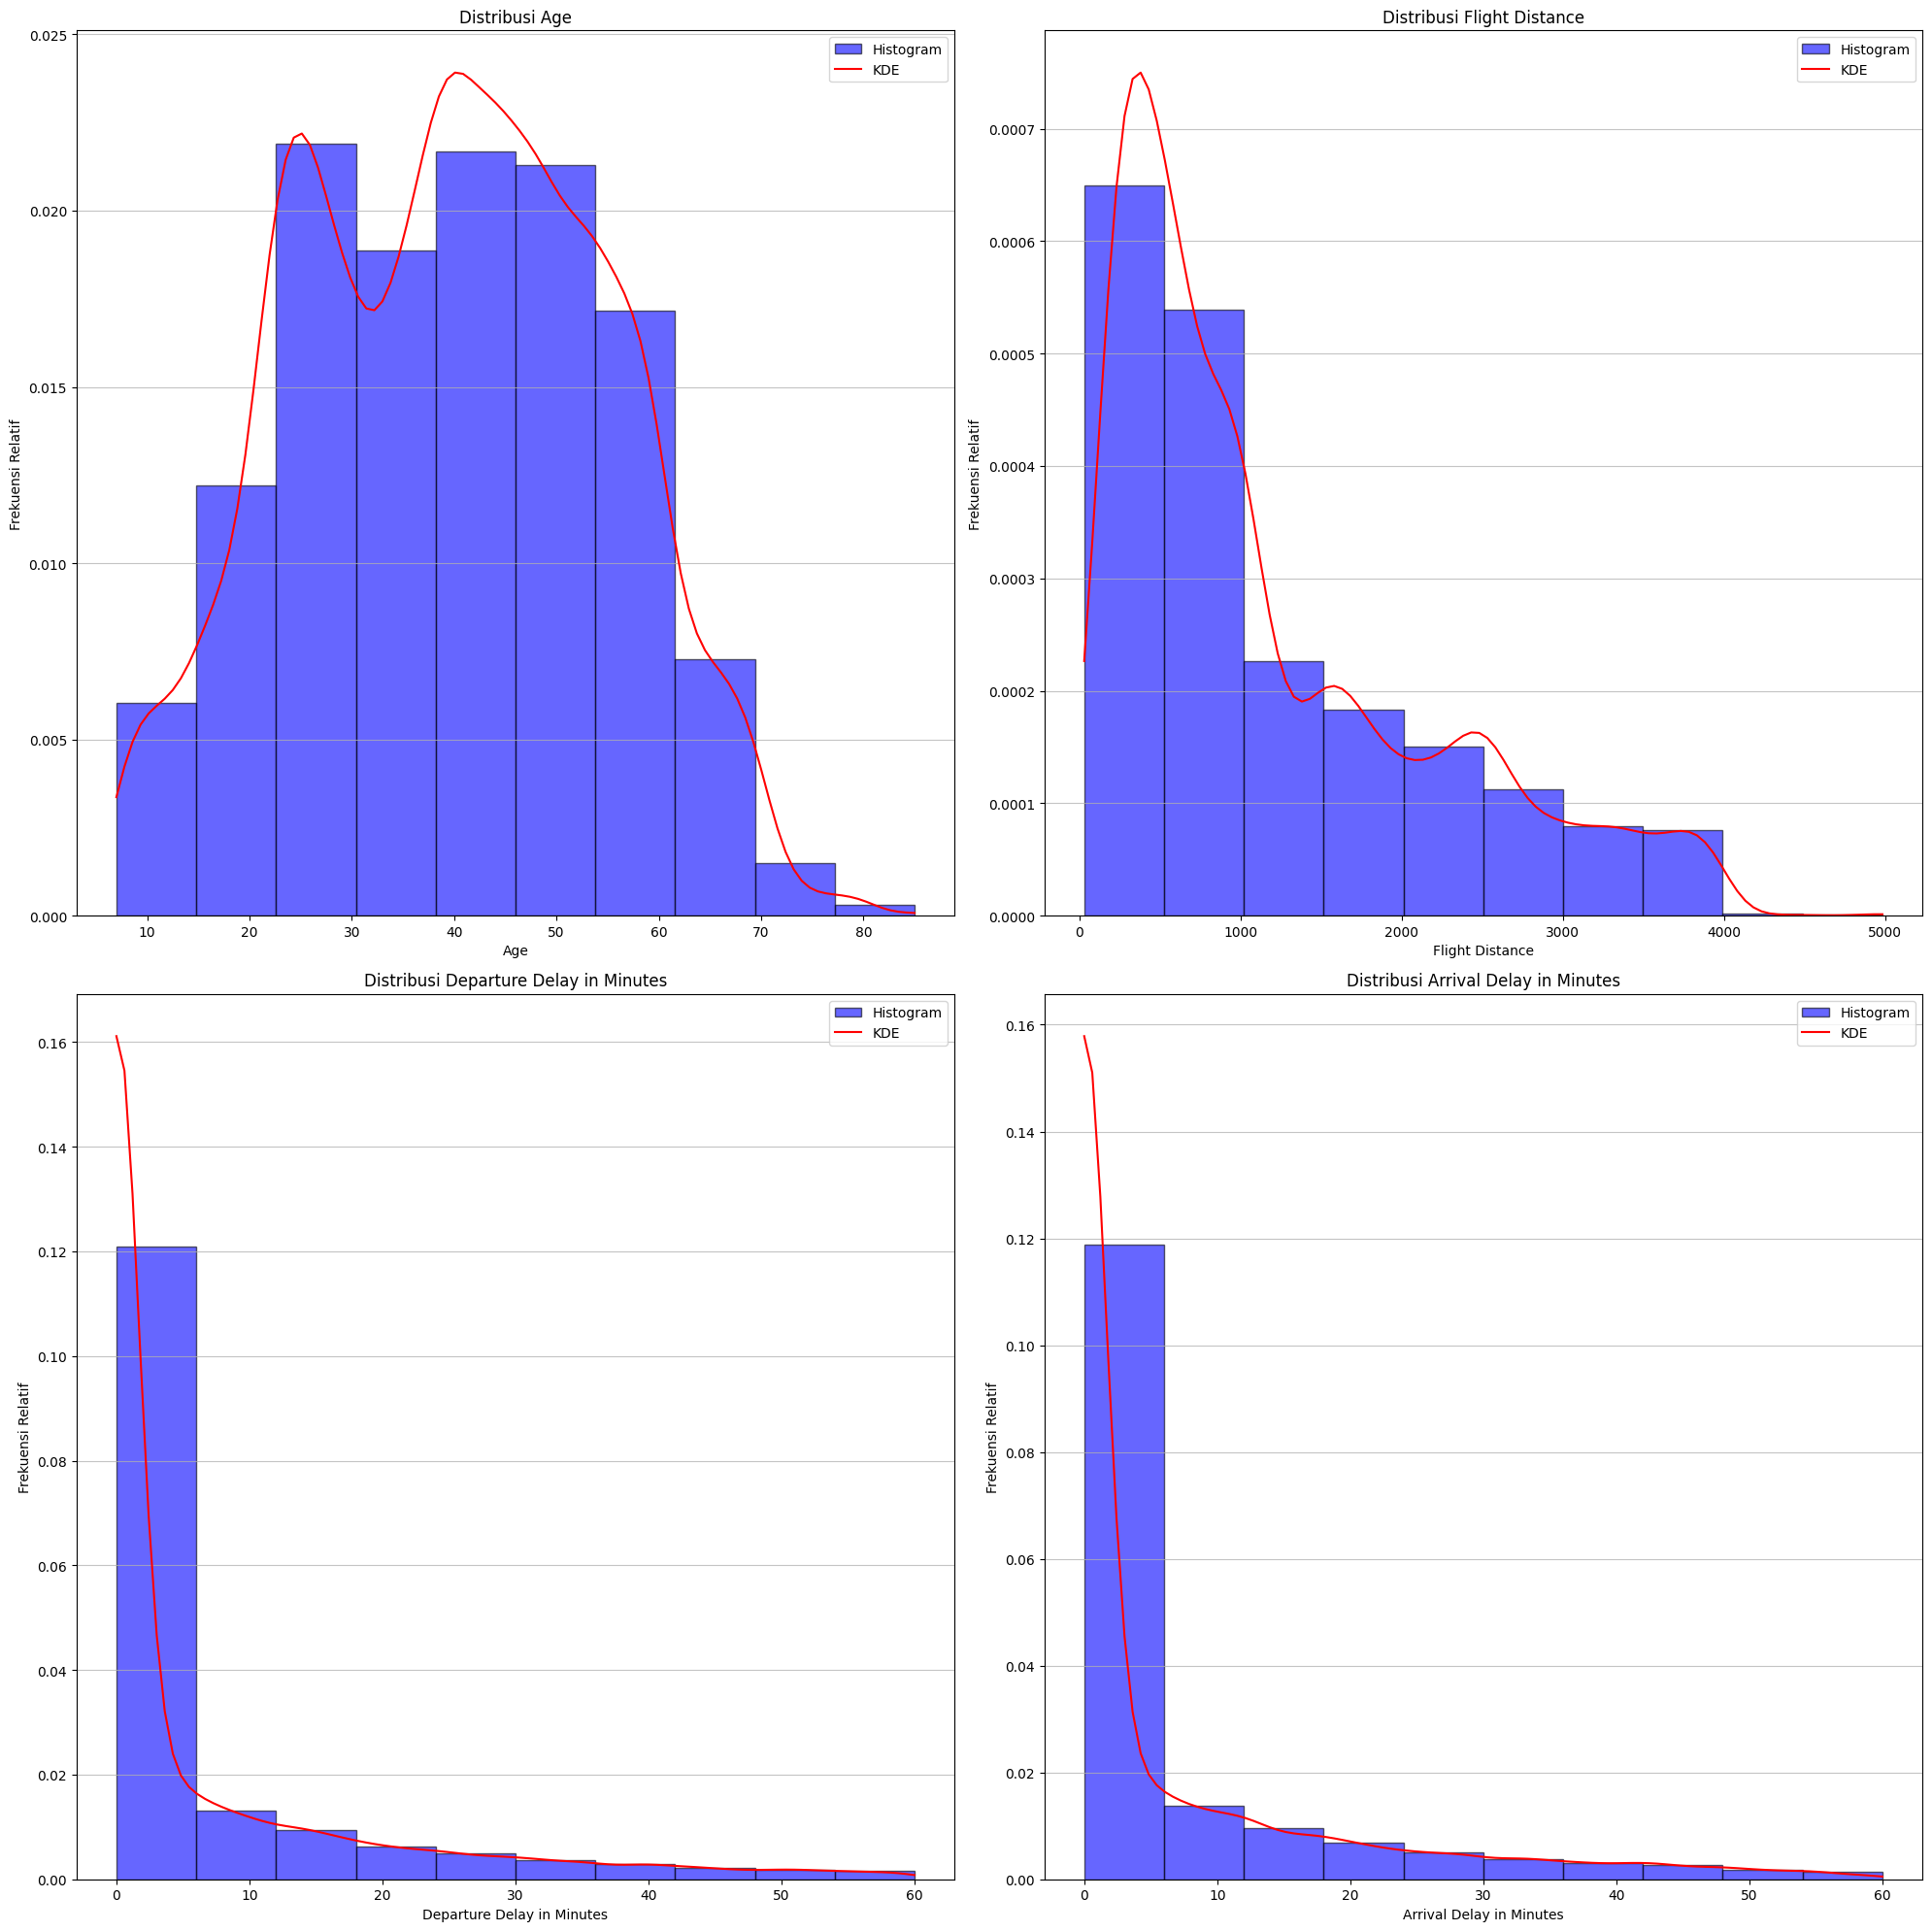

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Plot setiap kolom
for ax, kolom in zip(axes.flatten(), numerik):
    # Histogram
    data_col = a[kolom]
    ax.hist(data_col, bins=10, alpha=0.6, color='blue', edgecolor='black', density=True, label='Histogram')

    # Garis KDE
    kde = gaussian_kde(data_col)
    x_vals = np.linspace(data_col.min(), data_col.max(), 100)
    kde_vals = kde(x_vals)
    ax.plot(x_vals, kde_vals, color='red', label='KDE')

    ax.set_title(f'Distribusi {kolom}')
    ax.set_xlabel(kolom)
    ax.set_ylabel('Frekuensi Relatif')
    ax.legend()
    ax.grid(axis='y', alpha=0.75)

# Sesuaikan tata letak
plt.tight_layout()
plt.show()

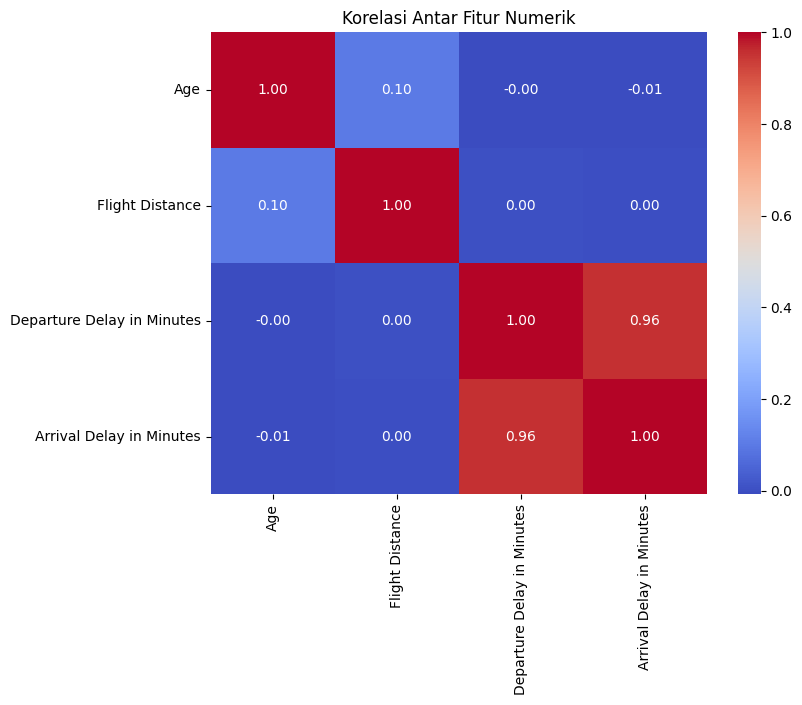

In [60]:
# Korelasi antar fitur numerik
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerik].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

In [61]:
print(f"karena {numerik[2:]} berkorelasi tinggi, maka salah satu harus dihapus")

karena ['Departure Delay in Minutes', 'Arrival Delay in Minutes'] berkorelasi tinggi, maka salah satu harus dihapus


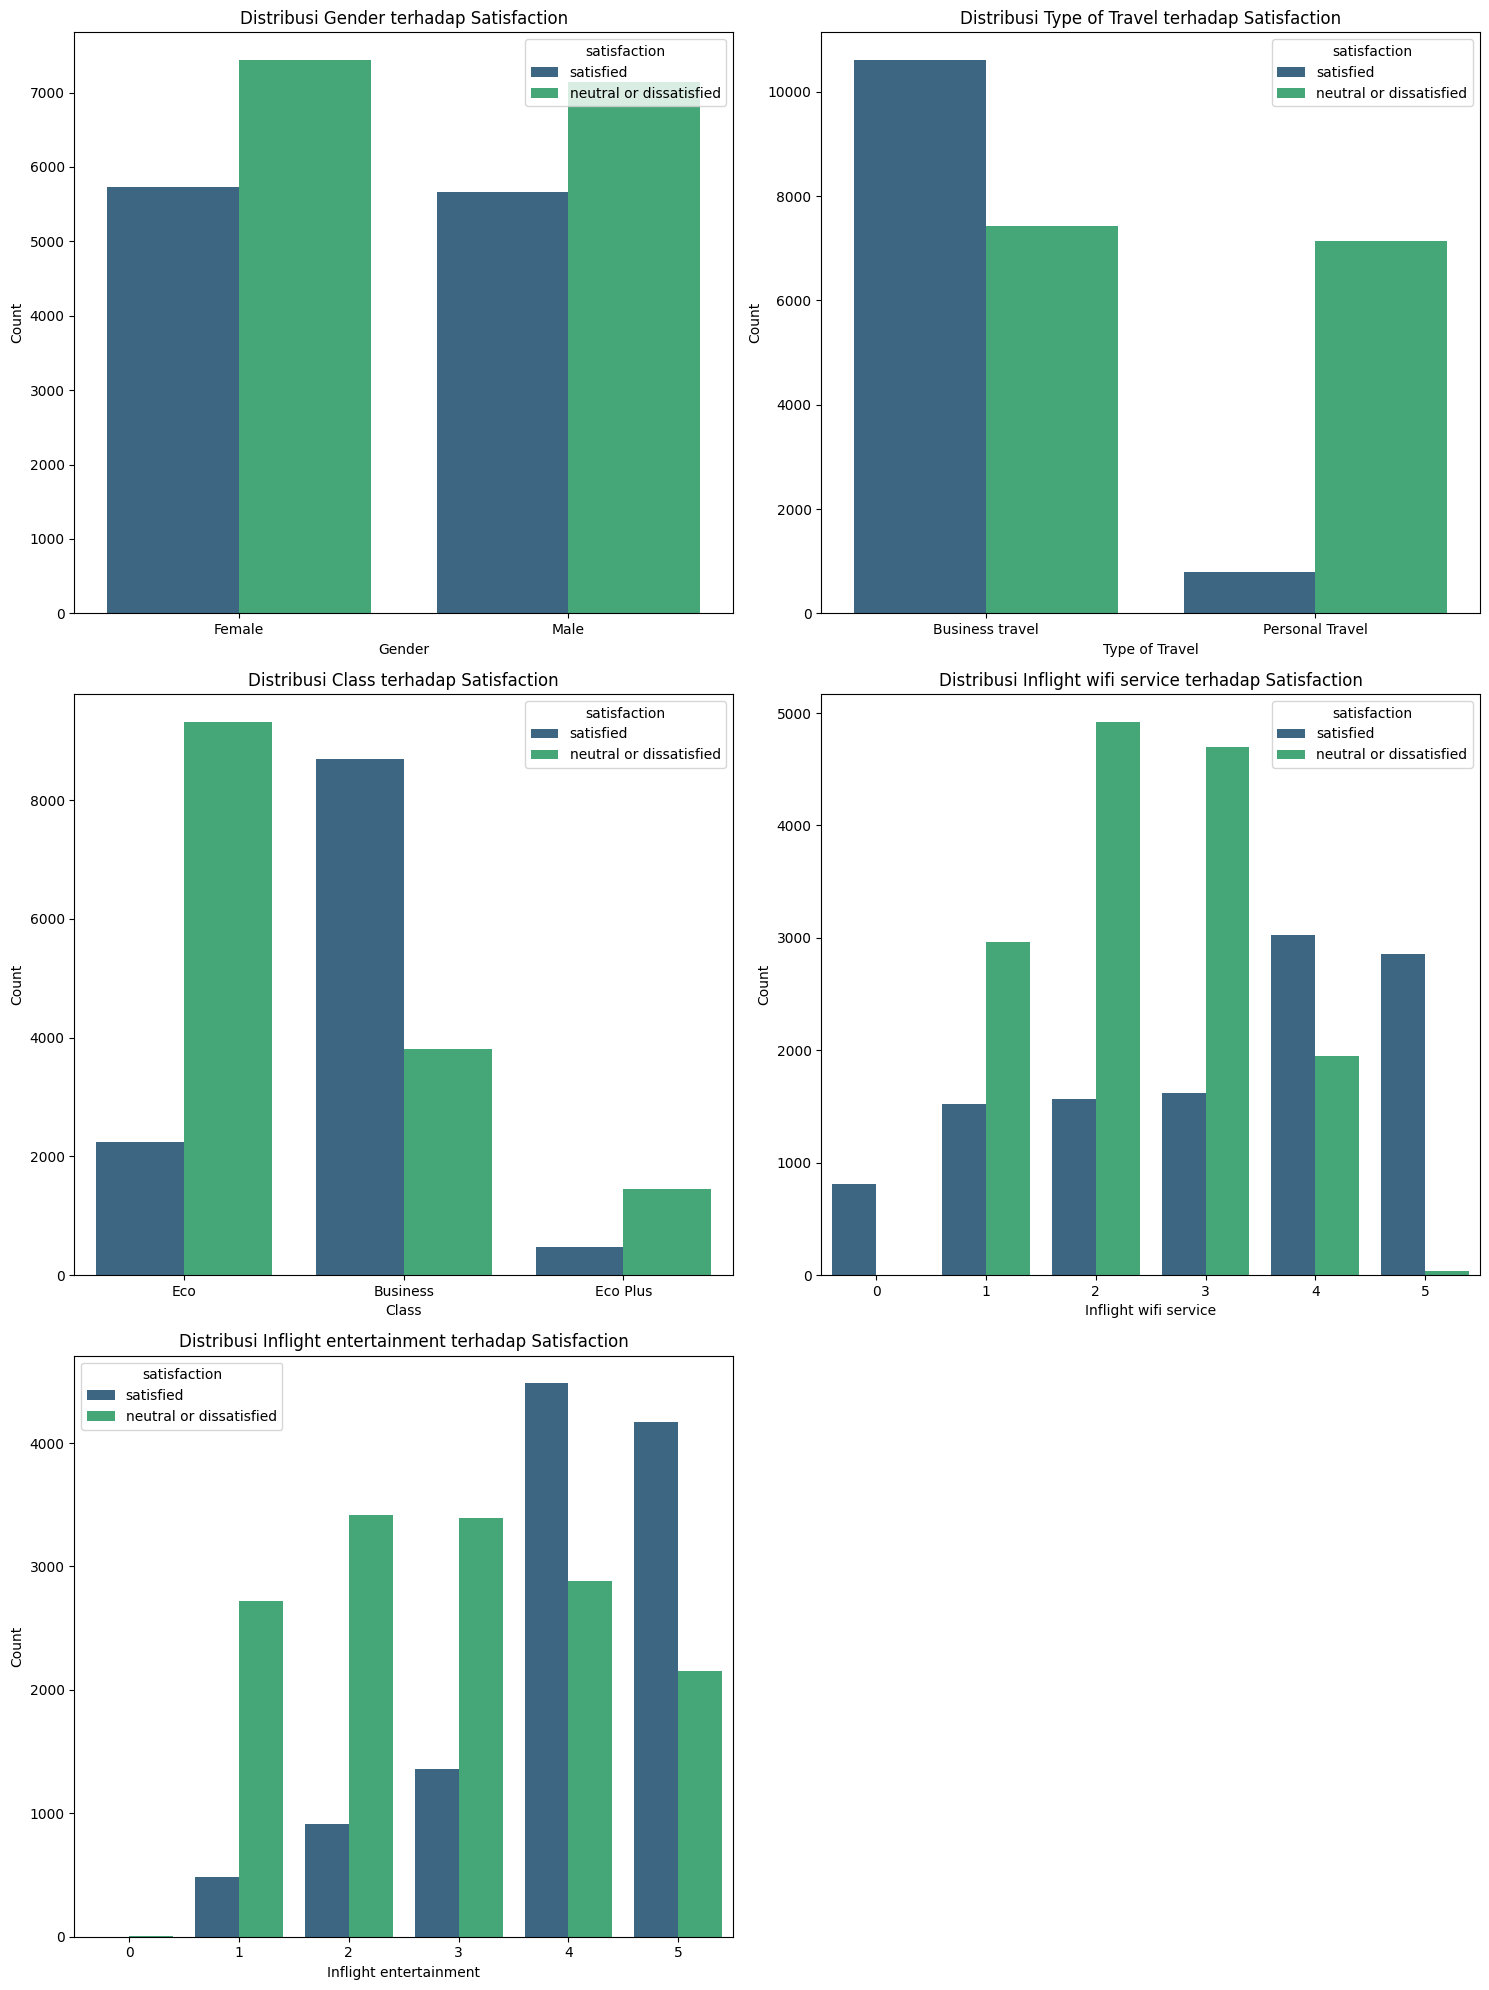

In [62]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(kategorik, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue='satisfaction', palette='viridis')
    plt.title(f'Distribusi {col} terhadap Satisfaction')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_17668\2681897631.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='satisfaction', y=col, palette='viridis')
C:\Users\Dell\AppData\Local\Temp\ipykernel_17668\2681897631.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='satisfaction', y=col, palette='viridis')
C:\Users\Dell\AppData\Local\Temp\ipykernel_17668\2681897631.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='satisfaction', y=col, palette='viridis')
C:\Users\Dell\AppData\Local\Temp\ipykernel_17668\268

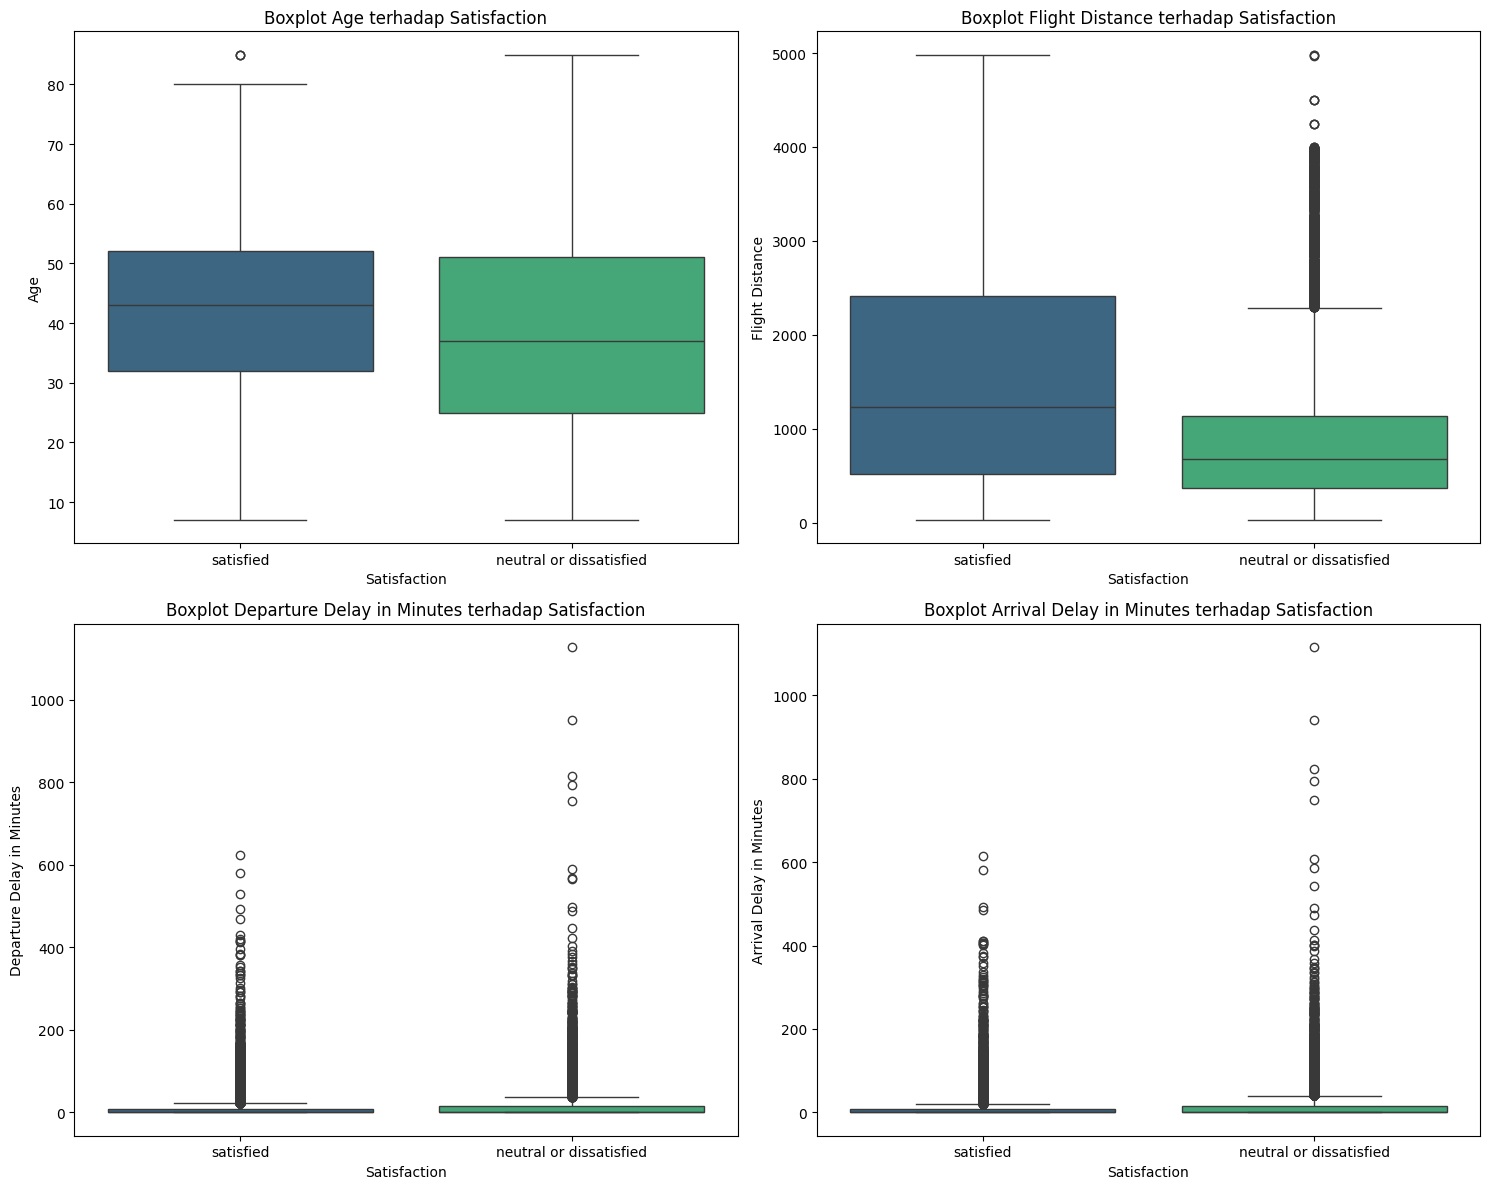

In [63]:

# Visualisasi hubungan variabel numerik dengan target
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerik, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='satisfaction', y=col, palette='viridis')
    plt.title(f'Boxplot {col} terhadap Satisfaction')
    plt.xlabel('Satisfaction')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [64]:
maped = {   0:1,
            1:1,
            2:2,
            3:2,
            4:3,
            5:3
                    }

df['Inflight entertainment'] = df['Inflight entertainment'].map(maped)
df['Inflight wifi service'] = df['Inflight wifi service'].map(maped)
#df['Class'] = df['Class'].map({ 'Eco' : 'Eco',
#                                'Eco Plus' : 'Eco',
#                                'Business' : 'Business'})

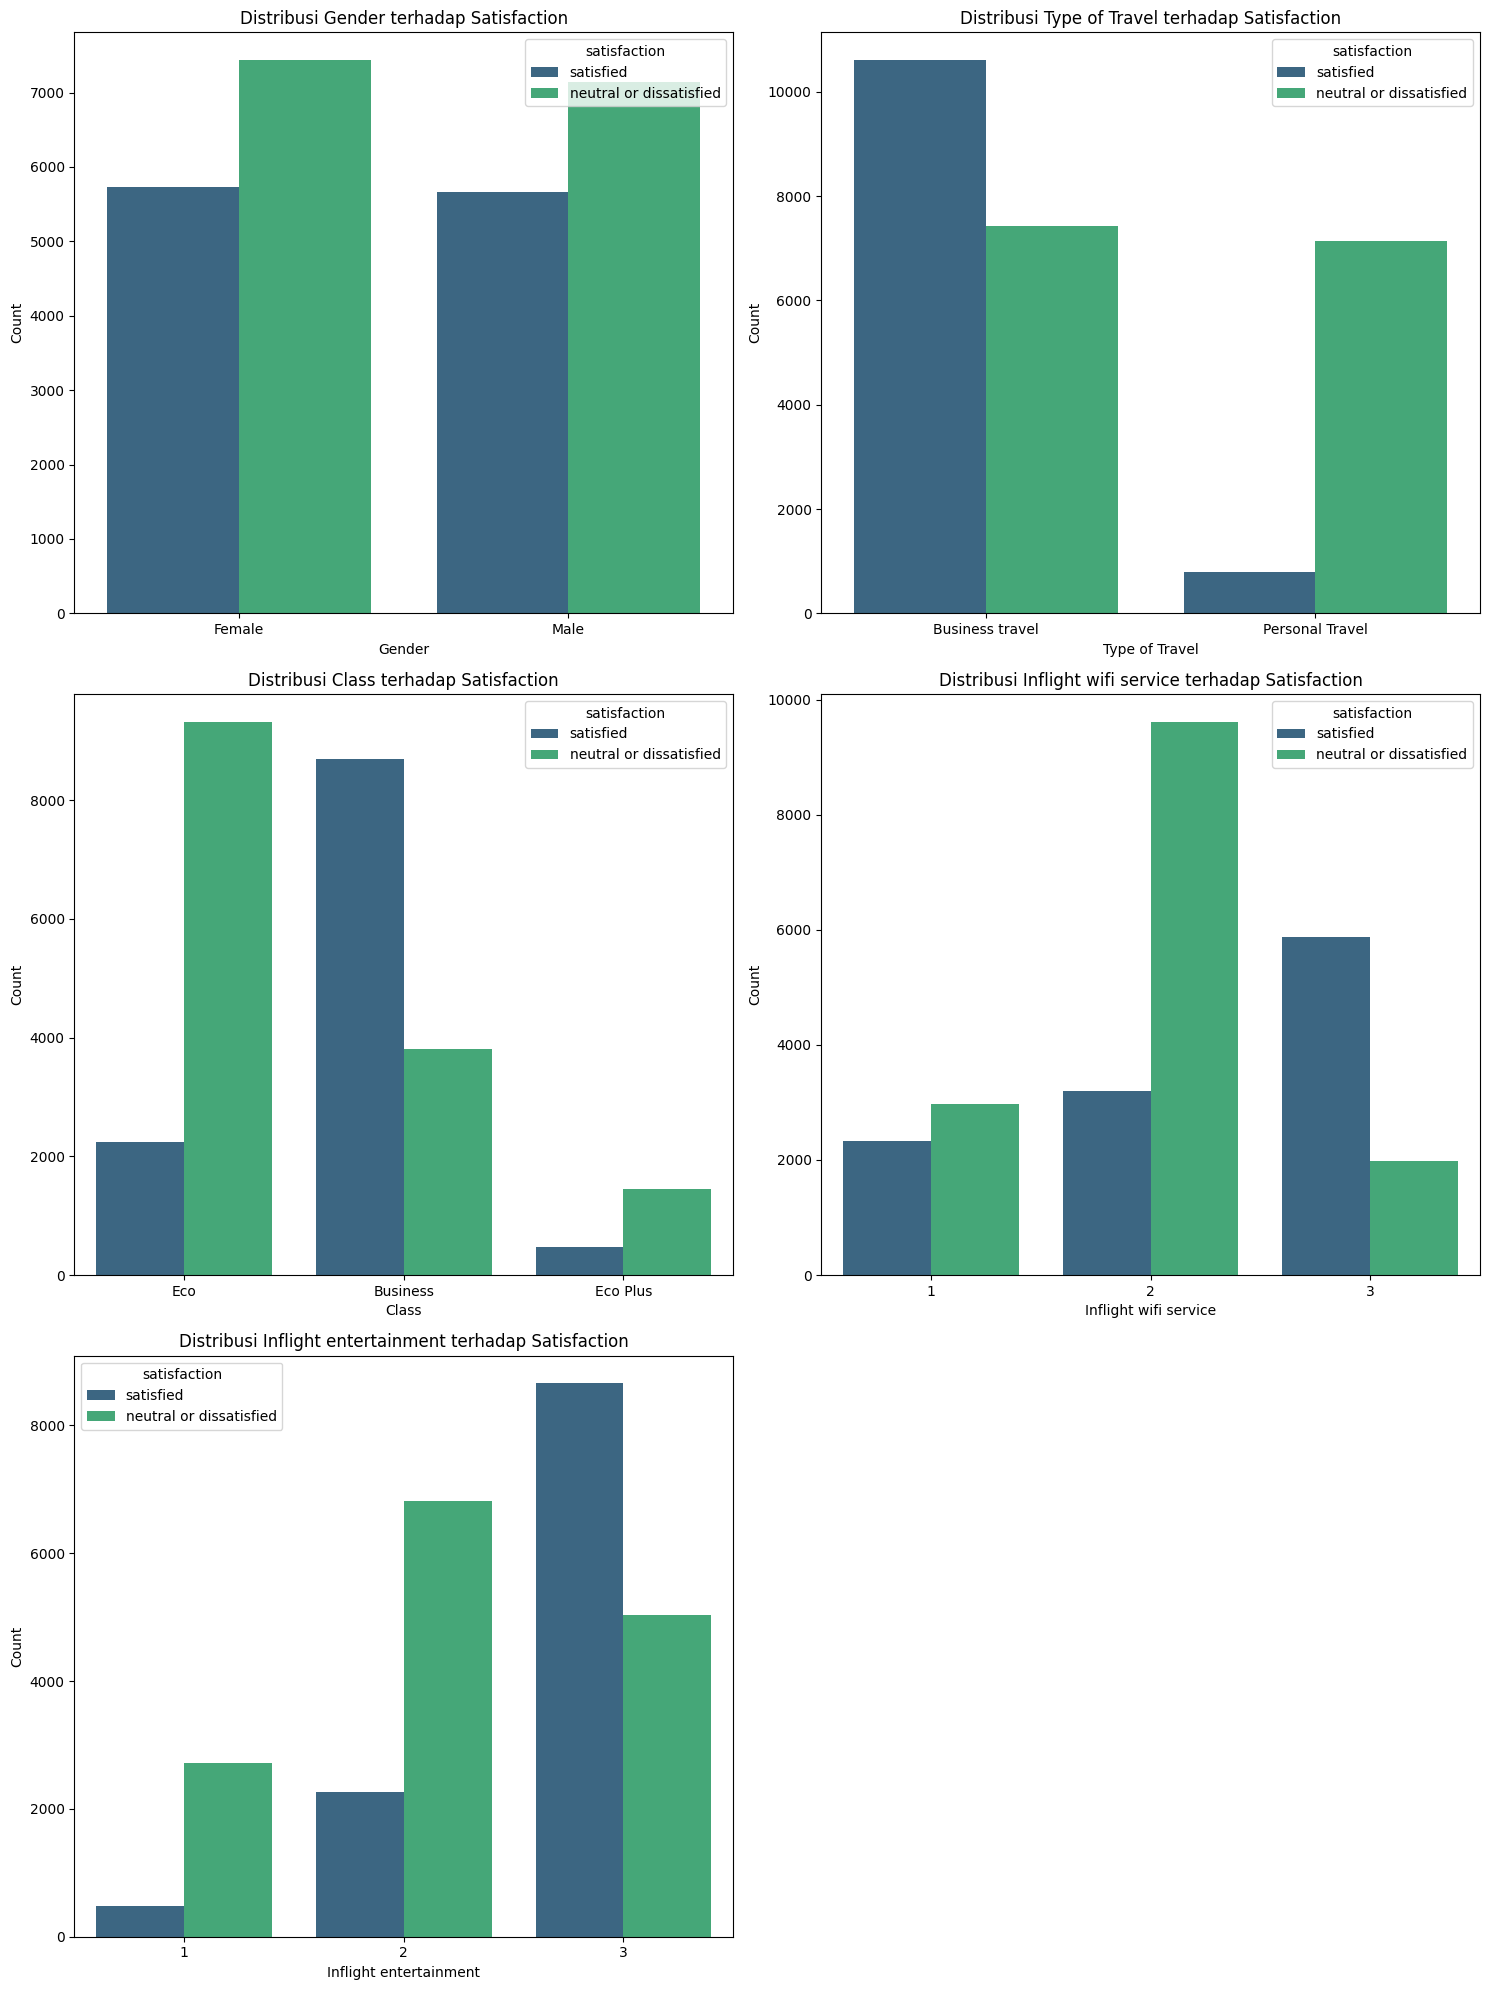

In [65]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(kategorik, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue='satisfaction', palette='viridis')
    plt.title(f'Distribusi {col} terhadap Satisfaction')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [66]:
from scipy.stats import chi2_contingency

for var in kategorik:
    table = pd.crosstab(df[var], df['satisfaction'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"Variabel: {var}, p-value: {p}")
    if p > 0.05:
        print(f"Variabel: {var} tidak signifikan terhadap kepuasan pelanggan\n")


Variabel: Gender, p-value: 0.24212849570930395
Variabel: Gender tidak signifikan terhadap kepuasan pelanggan

Variabel: Type of Travel, p-value: 0.0
Variabel: Class, p-value: 0.0
Variabel: Inflight wifi service, p-value: 0.0
Variabel: Inflight entertainment, p-value: 0.0


In [67]:
from scipy.stats import ttest_ind

for var in numerik:
    satisfied = df[df['satisfaction'] == 'satisfied'][var]
    not_satisfied = df[df['satisfaction'] == 'neutral or dissatisfied'][var]
    t_stat, p = ttest_ind(satisfied, not_satisfied, equal_var=False)
    print(f"Variabel: {var}, p-value: {p}")
    if p > 0.05:
        print(f"Variabel: {var} tidak signifikan terhadap target\n")


Variabel: Age, p-value: 2.594156784572796e-91
Variabel: Flight Distance, p-value: 0.0
Variabel: Departure Delay in Minutes, p-value: 1.7252844901055425e-17
Variabel: Arrival Delay in Minutes, p-value: 7.64947974259629e-24


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Gabungkan semua variabel numerik
X = df[numerik]
X = add_constant(X)  # Tambahkan konstanta untuk model regresi

# Hitung VIF
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif


,Variable,VIF
0,const,8.904674
1,Age,1.010102
2,Flight Distance,1.010092
3,Departure Delay in Minutes,11.562459
4,Arrival Delay in Minutes,11.562701


In [69]:
df = df[[   'satisfaction', 
            'Age', 'Flight Distance', 'Departure Delay in Minutes',
            'Gender', 'Type of Travel', 'Class', 'Inflight wifi service', 'Inflight entertainment'
            ]]

# MODEL

In [70]:
#dibuat sesuai Proposal

Target = ['satisfaction']
kategorik = ['Gender', 'Type of Travel', 'Class', 'Inflight wifi service', 'Inflight entertainment']
numerik = ['Age', 'Flight Distance', 'Departure Delay in Minutes']

In [71]:
for i in {"Target": Target, "numerik": numerik, "kategorik": kategorik}:
    print(f"variabel {i} :")
    for j in {"Target": Target, "numerik": numerik, "kategorik": kategorik}[i]:
        print(j)
    print('\n')

variabel Target :
satisfaction


variabel numerik :
Age
Flight Distance
Departure Delay in Minutes


variabel kategorik :
Gender
Type of Travel
Class
Inflight wifi service
Inflight entertainment




In [72]:
for i in kategorik:
    print(f"variabel {i}:")
    for j in sorted(df[i].unique().tolist()):
        print(f"{j}")
    print('\n')
    

variabel Gender:
Female
Male


variabel Type of Travel:
Business travel
Personal Travel


variabel Class:
Business
Eco
Eco Plus


variabel Inflight wifi service:
1
2
3


variabel Inflight entertainment:
1
2
3




In [73]:
num_pakai = [
                'Age', 
                'Flight Distance', 
                'Departure Delay in Minutes'
                                            ]

kat_pakai = [   
                'Gender',
                'Type of Travel',
                'Class',
                'Inflight wifi service',
                'Inflight entertainment'
                                            ]

drop_dummy = [  'Gender_Female',
                'Type of Travel_Business travel',
                'Class_Eco Plus',
                'Inflight wifi service_1',
                'Inflight entertainment_1'
                                            ]

In [74]:
df_model1 = df.copy()
df_model1['satisfaction'] = df_model1['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
df_model1.sample(6)

,satisfaction,Age,Flight Distance,Departure Delay in Minutes,Gender,Type of Travel,Class,Inflight wifi service,Inflight entertainment
25006,1,38,3810,4,Male,Business travel,Business,2,3
6109,0,51,2298,0,Male,Business travel,Business,2,2
23178,0,39,352,26,Female,Business travel,Business,1,2
956,0,25,374,25,Male,Business travel,Eco,2,3
15630,1,30,566,0,Male,Business travel,Eco,3,3
11611,0,24,265,6,Male,Personal Travel,Eco,1,3


In [75]:
df_model1 = df_model1[Target + num_pakai + kat_pakai]

df_model1 = pd.get_dummies(df_model1, columns=kat_pakai)
df_model1.sample(6)

,satisfaction,Age,Flight Distance,Departure Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3
8145,0,65,406,15,False,True,False,True,False,True,False,True,False,False,True,False,False
14040,0,15,909,0,True,False,True,False,False,True,False,False,True,False,False,False,True
13457,1,55,446,0,True,False,True,False,True,False,False,False,True,False,False,False,True
6270,0,26,628,5,True,False,True,False,False,True,False,False,True,False,False,True,False
23082,1,52,3998,62,True,False,True,False,True,False,False,False,True,False,False,False,True
24348,0,33,236,80,True,False,True,False,True,False,False,False,True,False,False,True,False


In [76]:
df_model1.columns

Index(['satisfaction', 'Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Gender_Female', 'Gender_Male', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Inflight wifi service_1', 'Inflight wifi service_2',
       'Inflight wifi service_3', 'Inflight entertainment_1',
       'Inflight entertainment_2', 'Inflight entertainment_3'],
      dtype='object')

In [77]:
#penghapusan 1 dummy

for i in df_model1.columns[3:]:
    df_model1[i] = df_model1[i].astype(int)

#df_model1 = df_model1.drop(columns=df_model1.columns[-1])
df_model1 = df_model1.drop(columns = drop_dummy)

df_model1.sample(8)

,satisfaction,Age,Flight Distance,Departure Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Class_Business,Class_Eco,Inflight wifi service_2,Inflight wifi service_3,Inflight entertainment_2,Inflight entertainment_3
8907,0,63,516,0,0,1,0,1,1,0,0,1
25566,1,55,2964,35,0,0,1,0,0,1,0,1
4910,0,43,1197,0,0,0,0,0,1,0,1,0
13757,1,45,1875,0,1,0,1,0,1,0,0,1
18175,0,30,1636,1,1,0,1,0,0,0,0,0
7580,1,58,1752,0,0,0,1,0,1,0,0,1
21466,0,18,861,37,1,0,0,1,0,1,0,0
19643,0,55,925,0,0,1,0,1,0,0,0,1


In [78]:
#Interaksi

#df_model1['jarak_persnal travel'] = df_model1['Flight Distance'] * df_model1['Type of Travel_Personal Travel']
#for i in ['Class_Business', 'Class_Eco']:
    #df_model1[f"Delay_{i}"] = df_model1['Departure Delay in Minutes'] * df_model1[i]

df_model1.sample(6)

,satisfaction,Age,Flight Distance,Departure Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Class_Business,Class_Eco,Inflight wifi service_2,Inflight wifi service_3,Inflight entertainment_2,Inflight entertainment_3
13459,0,44,472,0,0,0,0,1,1,0,0,0
5444,0,57,2475,0,1,1,0,1,1,0,0,0
11716,0,41,1826,71,1,0,0,1,0,0,0,0
18222,1,45,632,0,1,0,1,0,0,1,1,0
12956,1,28,835,0,0,0,1,0,0,1,1,0
20692,0,43,657,0,1,0,1,0,1,0,1,0


In [79]:
X1 = df_model1.drop(columns=['satisfaction'])
y1 = df_model1['satisfaction']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.98, random_state=42)

In [80]:
X1_train_const = sm.add_constant(X1_train)


# Membuat model
model_glm1 = sm.GLM(y1_train, X1_train_const, family=sm.families.Binomial())
model1 = model_glm1.fit()

# Ringkasan hasil
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           satisfaction   No. Observations:                  519
Model:                            GLM   Df Residuals:                      507
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -188.28
Date:                Thu, 12 Dec 2024   Deviance:                       376.55
Time:                        15:22:46   Pearson chi2:                     590.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4831
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [81]:
from scipy.stats import chi2  # Impor chi2 untuk distribusi chi-square

# Prediksi probabilitas menggunakan model GLM dari Statsmodels
df_model1['predicted_prob'] = model1.predict(X1_train_const)  # Statsmodels: .predict() memberikan probabilitas

# Membagi df_model1 menjadi 10 grup berdasarkan kuantil probabilitas prediksi
df_model1['decile'] = pd.qcut(df_model1['predicted_prob'], q=10, labels=False)

# Hitung observed dan expected untuk setiap grup
hl_table = df_model1.groupby('decile').apply(
    lambda group: pd.Series({
        'observed': group['satisfaction'].sum(),  # Jumlah aktual (1) dalam grup
        'expected': group['predicted_prob'].sum(),  # Jumlah probabilitas dalam grup
        'group_size': group.shape[0]  # Ukuran grup
    })
)

# Hitung statistik Hosmer-Lemeshow
hl_table['hl_stat'] = ((hl_table['observed'] - hl_table['expected']) ** 2) / (
    hl_table['expected'] * (1 - (hl_table['expected'] / hl_table['group_size']))
)

# Hitung statistik chi-square total
hosmer_lemeshow_stat = hl_table['hl_stat'].sum()

# Derajat kebebasan (df) = jumlah grup - 2
deg_free = hl_table.shape[0] - 2

# Hitung p-value menggunakan distribusi chi-square
p_value = 1 - chi2.cdf(hosmer_lemeshow_stat, deg_free)

# Tampilkan hasil
print(f"Hosmer-Lemeshow chi-square statistic: {hosmer_lemeshow_stat:.4f}")
print(f"Degrees of freedom: {deg_free}")
print(f"P-value: {p_value:.4f}")

# Interpretasi
if p_value > 0.05:
    print("Model memiliki goodness-of-fit yang baik (fit baik).\n")
else:
    print("Model memiliki goodness-of-fit yang buruk (fit kurang baik).\n")


Hosmer-Lemeshow chi-square statistic: 29.1499
Degrees of freedom: 8
P-value: 0.0003
Model memiliki goodness-of-fit yang buruk (fit kurang baik).



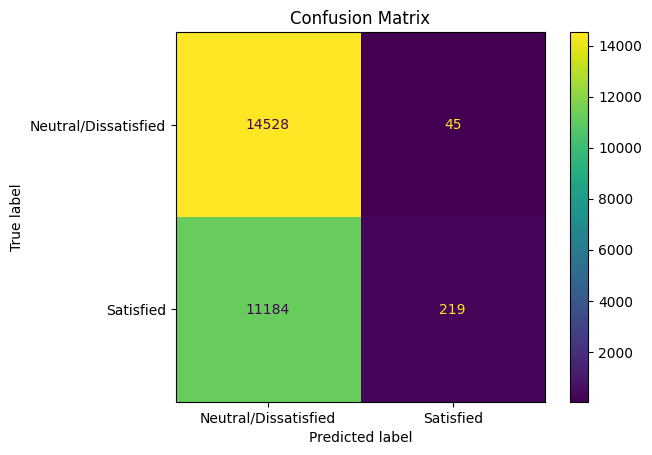

In [82]:
# Prediksi probabilitas kelas positif menggunakan Statsmodels
df_model1['predicted_prob'] = model1.predict(X1_train_const)  # Statsmodels hanya punya 'predict'

# Tentukan ambang batas (threshold), default = 0.5
threshold = 0.5
df_model1['predicted_class'] = (df_model1['predicted_prob'] >= threshold).astype(int)

# Hitung confusion matrix
cm = confusion_matrix(df_model1['satisfaction'], df_model1['predicted_class'])

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Neutral/Dissatisfied', 'Satisfied'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


In [83]:
# Menghitung Confusion Matrix
cm = confusion_matrix(df_model1['satisfaction'], df_model1['predicted_class'])
tn, fp, fn, tp = cm.ravel()  # Memecah confusion matrix menjadi nilai individu

# Menghitung metrik secara manual
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Menampilkan metrik
print("Confusion Matrix:")
print(cm)
print("\nMetrik Performa:")
print(f"Accuracy    : {accuracy:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f}")
print(f"Specificity : {specificity:.4f}")

Confusion Matrix:
[[14528    45]
 [11184   219]]

Metrik Performa:
Accuracy    : 0.5677
Precision   : 0.8295
Recall      : 0.0192
Specificity : 0.9969


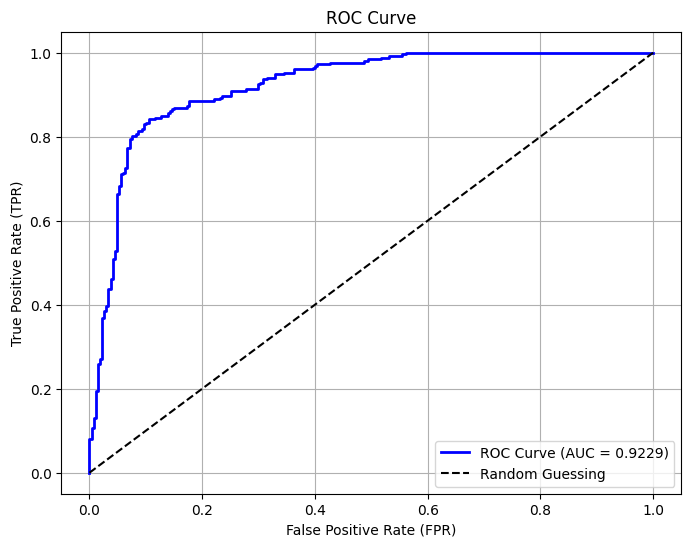

AUC Score: 0.9229


In [84]:
# Hitung FPR, TPR, dan Thresholds
df_model1.dropna(inplace=True)
fpr, tpr, thresholds = roc_curve(df_model1['satisfaction'], df_model1['predicted_prob'])

# Hitung AUC
auc_score = roc_auc_score(df_model1['satisfaction'], df_model1['predicted_prob'])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # Garis diagonal
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Tampilkan nilai AUC
print(f"AUC Score: {auc_score:.4f}")


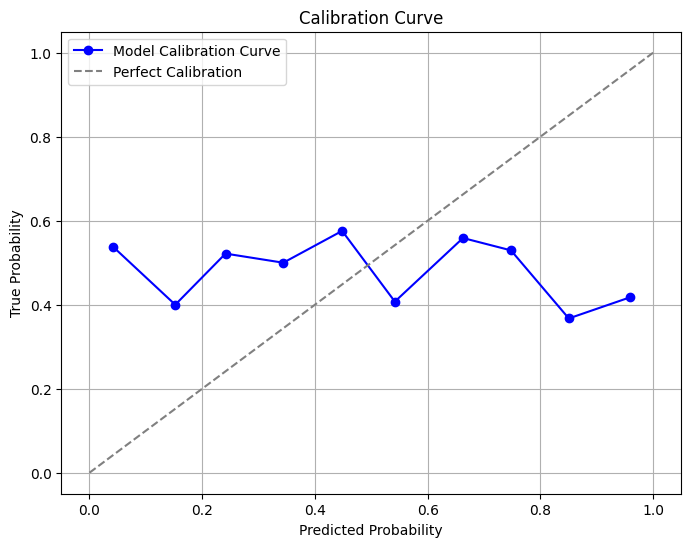

In [85]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
import numpy as np

# Asumsi: 
# y_train_actual = nilai aktual dari target pada dataset pelatihan
# y_train_pred_prob = probabilitas prediksi dari model pada dataset pelatihan

# Hitung calibration curve
prob_true, prob_pred = calibration_curve(y1_train, df_model1['predicted_prob'].to_list(), n_bins=10, strategy='uniform')

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model Calibration Curve', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration', color='gray')

# Menambahkan informasi visual
plt.title('Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.grid()
plt.show()


# Batas

In [86]:
num_pakai2 = [
                'Age', 
                'Flight Distance', 
                'Departure Delay in Minutes'
                                            ]

kat_pakai2 = [   
                'Gender',
                'Type of Travel',
                'Class',
                'Inflight wifi service',
                'Inflight entertainment'
                                            ]

drop_dummy2 = [ 'Gender_Female',
                'Type of Travel_Business travel',
                'Class_Eco Plus',
                'Inflight wifi service_1',
                'Inflight entertainment_1'
                                            ]

In [87]:
df_model2 = df.copy()
df_model2['satisfaction'] = df_model2['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})
df_model2.sample(6)

,satisfaction,Age,Flight Distance,Departure Delay in Minutes,Gender,Type of Travel,Class,Inflight wifi service,Inflight entertainment
25669,0,59,679,54,Female,Personal Travel,Eco,2,3
15468,0,40,2570,0,Female,Business travel,Business,3,3
13629,0,24,907,0,Female,Personal Travel,Eco,2,2
12026,1,49,2860,0,Female,Business travel,Business,2,3
9642,0,31,1554,0,Female,Business travel,Eco,2,1
5059,0,41,3382,43,Male,Business travel,Business,1,2


In [88]:
df_model2 = df_model2[Target + num_pakai2 + kat_pakai2]

df_model2 = pd.get_dummies(df_model2, columns=kat_pakai2)
df_model2.sample(6)

,satisfaction,Age,Flight Distance,Departure Delay in Minutes,Gender_Female,Gender_Male,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3
24640,1,48,1013,0,False,True,False,True,False,False,True,False,False,True,False,True,False
9358,0,45,1843,75,True,False,True,False,True,False,False,False,True,False,False,True,False
2252,1,36,134,0,True,False,True,False,False,False,True,False,False,True,False,False,True
19535,0,51,2458,0,True,False,True,False,True,False,False,True,False,False,True,False,False
7141,1,39,187,0,True,False,True,False,False,True,False,False,False,True,False,False,True
9181,1,43,1744,0,False,True,True,False,True,False,False,False,True,False,False,True,False


In [89]:
#penghapusan 1 dummy

for i in df_model2.columns[3:]:
    df_model2[i] = df_model2[i].astype(int)

#df_model2 = df_model2.drop(columns=df_model2.columns[-1])
df_model2 = df_model2.drop(columns = drop_dummy2)

df_model2.sample(8)

,satisfaction,Age,Flight Distance,Departure Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Class_Business,Class_Eco,Inflight wifi service_2,Inflight wifi service_3,Inflight entertainment_2,Inflight entertainment_3
5917,0,16,486,12,0,1,0,1,1,0,0,1
19875,0,67,1095,0,1,1,0,1,0,1,1,0
18883,1,16,548,0,0,0,0,1,0,1,0,1
18279,1,44,1559,12,1,0,1,0,0,0,1,0
13086,0,24,1846,249,0,1,0,1,1,0,1,0
16735,0,35,533,0,0,0,0,1,1,0,0,0
17741,1,40,1988,22,1,0,1,0,0,0,0,1
20898,1,43,719,0,0,0,1,0,1,0,0,1


In [90]:
df_model2.columns

Index(['satisfaction', 'Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Gender_Male', 'Type of Travel_Personal Travel', 'Class_Business',
       'Class_Eco', 'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight entertainment_2', 'Inflight entertainment_3'],
      dtype='object')

In [91]:
#Antar Kolom Numerik
#df_model2['Age_FD'] = df_model2['Age'] * df_model2['Flight Distance']                                  ###
#df_model2['Age_Delay'] = df_model2['Age'] * df_model2['Departure Delay in Minutes']                    ###
#df_model2['FD_Delay'] = df_model2['Flight Distance'] * df_model2['Departure Delay in Minutes']         #

#Age
#df_model2[f"Age_Male"] = df_model2['Age'] * df_model2['Gender_Male']                                   #
#df_model2[f"Age_Personal Travel"] = df_model2['Age'] * df_model2['Type of Travel_Personal Travel']     ###
#for kelas in ['Class_Business', 'Class_Eco']:                                                          #
    #df_model2[f"Age_{kelas}"] = df_model2['Age'] * df_model2[kelas]
#for wifi in ['Inflight wifi service_2', 'Inflight wifi service_3']:                                    ###
    #df_model2[f"Age_{wifi}"] = df_model2['Age'] * df_model2[wifi]
#for entertainment in ['Inflight entertainment_2', 'Inflight entertainment_3']:                         ###
    #df_model2[f"Age_{entertainment}"] = df_model2['Age'] * df_model2[entertainment]

#Flight Distance
#df_model2[f"FD_Male"] = df_model2['Flight Distance'] * df_model2['Gender_Male']                                                 #
#df_model2[f"FD_Personal Travel"] = df_model2['Flight Distance'] * df_model2['Type of Travel_Personal Travel']                   ###
#for kelas in ['Class_Business', 'Class_Eco']:                                                                                   #
    #df_model2[f"FD_{kelas}"] = df_model2['Flight Distance'] * df_model2[kelas]
#for wifi in ['Inflight wifi service_2', 'Inflight wifi service_3']:                                                             ###
#    df_model2[f"FD_{wifi}"] = df_model2['Flight Distance'] * df_model2[wifi]
for entertainment in ['Inflight entertainment_2', 'Inflight entertainment_3']:                                                  ###
    df_model2[f"FD_{entertainment}"] = df_model2['Flight Distance'] * df_model2[entertainment]

#Departure Delay in Minutes
#df_model2[f"Delay_Male"] = df_model2['Departure Delay in Minutes'] * df_model2['Gender_Male']                                   #
#df_model2[f"Delay_Personal Travel"] = df_model2['Departure Delay in Minutes'] * df_model2['Type of Travel_Personal Travel']     ###
#for kelas in ['Class_Business', 'Class_Eco']:                                                                                   #
#    df_model2[f"Delay_{kelas}"] = df_model2['Departure Delay in Minutes'] * df_model2[kelas]
#for wifi in ['Inflight wifi service_2', 'Inflight wifi service_3']:                                                             #
    #df_model2[f"Delay_{wifi}"] = df_model2['Departure Delay in Minutes'] * df_model2[wifi]
#for entertainment in ['Inflight entertainment_2', 'Inflight entertainment_3']:                                                  #
#    df_model2[f"Delay_{entertainment}"] = df_model2['Departure Delay in Minutes'] * df_model2[entertainment]

df_model2.sample(6)


,satisfaction,Age,Flight Distance,Departure Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Class_Business,Class_Eco,Inflight wifi service_2,Inflight wifi service_3,Inflight entertainment_2,Inflight entertainment_3,FD_Inflight entertainment_2,FD_Inflight entertainment_3
19708,0,25,265,85,0,0,0,1,0,0,0,1,0,265
1654,1,43,251,8,1,0,1,0,0,1,0,1,0,251
20102,1,54,481,0,1,0,1,0,0,0,0,1,0,481
11882,0,48,501,0,0,1,0,1,1,0,1,0,501,0
22876,1,29,861,6,0,0,1,0,0,1,0,1,0,861
4418,0,20,936,1,0,1,0,1,1,0,0,0,0,0


In [92]:
X2 = df_model2.drop(columns=['satisfaction'])
y2 = df_model2['satisfaction']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.0000000000001, random_state=42)

In [93]:
X2_train_const = sm.add_constant(X2_train)

# Membuat model
model_glm2 = sm.GLM(y2_train, X2_train_const, family=sm.families.Binomial())
model2 = model_glm2.fit()

# Ringkasan hasil
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           satisfaction   No. Observations:                25975
Model:                            GLM   Df Residuals:                    25961
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9636.3
Date:                Thu, 12 Dec 2024   Deviance:                       19273.
Time:                        15:22:48   Pearson chi2:                 3.40e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4671
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [94]:
from scipy.stats import chi2  # Impor chi2 untuk distribusi chi-square

# Prediksi probabilitas menggunakan model GLM dari Statsmodels
df_model2['predicted_prob'] = model2.predict(X2_train_const)  # Statsmodels: .predict() memberikan probabilitas

# Membagi df_model2 menjadi 10 grup berdasarkan kuantil probabilitas prediksi
df_model2['decile'] = pd.qcut(df_model2['predicted_prob'], q=10, labels=False)

# Hitung observed dan expected untuk setiap grup
hl_table = df_model2.groupby('decile').apply(
    lambda group: pd.Series({
        'observed': group['satisfaction'].sum(),  # Jumlah aktual (1) dalam grup
        'expected': group['predicted_prob'].sum(),  # Jumlah probabilitas dalam grup
        'group_size': group.shape[0]  # Ukuran grup
    })
)

# Hitung statistik Hosmer-Lemeshow
hl_table['hl_stat'] = ((hl_table['observed'] - hl_table['expected']) ** 2) / (
    hl_table['expected'] * (1 - (hl_table['expected'] / hl_table['group_size']))
)

# Hitung statistik chi-square total
hosmer_lemeshow_stat = hl_table['hl_stat'].sum()

# Derajat kebebasan (df) = jumlah grup - 2
deg_free = hl_table.shape[0] - 2

# Hitung p-value menggunakan distribusi chi-square
p_value = 1 - chi2.cdf(hosmer_lemeshow_stat, deg_free)

# Tampilkan hasil
print(f"Hosmer-Lemeshow chi-square statistic: {hosmer_lemeshow_stat:.4f}")
print(f"Degrees of freedom: {deg_free}")
print(f"P-value: {p_value:.4f}")

# Interpretasi
if p_value > 0.05:
    print("Model memiliki goodness-of-fit yang baik (fit baik).\n")
else:
    print("Model memiliki goodness-of-fit yang buruk (fit kurang baik).\n")


Hosmer-Lemeshow chi-square statistic: 1158.4233
Degrees of freedom: 8
P-value: 0.0000
Model memiliki goodness-of-fit yang buruk (fit kurang baik).



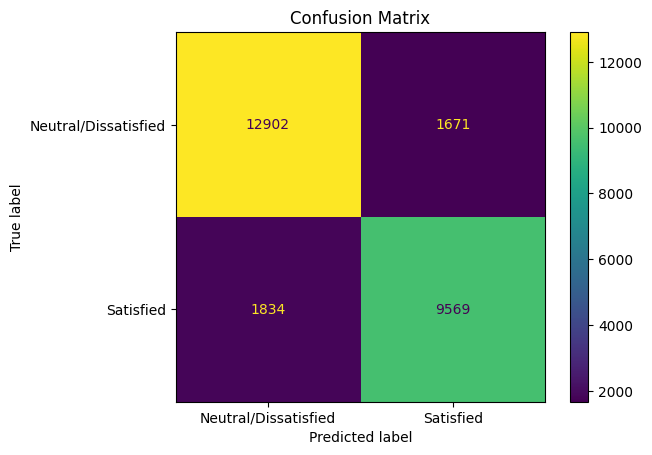

In [95]:
# Prediksi probabilitas kelas positif menggunakan Statsmodels
df_model2['predicted_prob'] = model2.predict(X2_train_const)  # Statsmodels hanya punya 'predict'

# Tentukan ambang batas (threshold), default = 0.5
threshold = 0.5
df_model2['predicted_class'] = (df_model2['predicted_prob'] >= threshold).astype(int)

# Hitung confusion matrix
cm = confusion_matrix(df_model2['satisfaction'], df_model2['predicted_class'])

# Tampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Neutral/Dissatisfied', 'Satisfied'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


In [96]:
# Menghitung Confusion Matrix
cm = confusion_matrix(df_model2['satisfaction'], df_model2['predicted_class'])
tn, fp, fn, tp = cm.ravel()  # Memecah confusion matrix menjadi nilai individu

# Menghitung metrik secara manual
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Menampilkan metrik
print("Confusion Matrix:")
print(cm)
print("\nMetrik Performa:")
print(f"Accuracy    : {accuracy:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f}")
print(f"Specificity : {specificity:.4f}")

Confusion Matrix:
[[12902  1671]
 [ 1834  9569]]

Metrik Performa:
Accuracy    : 0.8651
Precision   : 0.8513
Recall      : 0.8392
Specificity : 0.8853


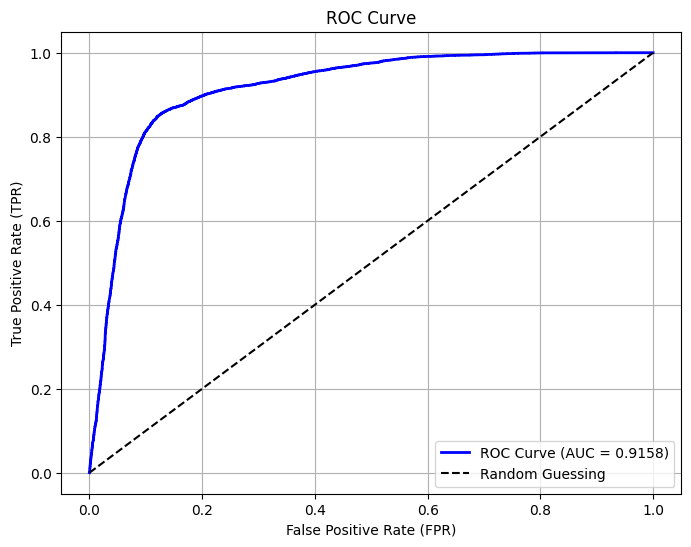

AUC Score: 0.9158


In [97]:
# Hitung FPR, TPR, dan Thresholds
df_model2.dropna(inplace=True)
fpr, tpr, thresholds = roc_curve(df_model2['satisfaction'], df_model2['predicted_prob'])

# Hitung AUC
auc_score = roc_auc_score(df_model2['satisfaction'], df_model2['predicted_prob'])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})", color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # Garis diagonal
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Tampilkan nilai AUC
print(f"AUC Score: {auc_score:.4f}")


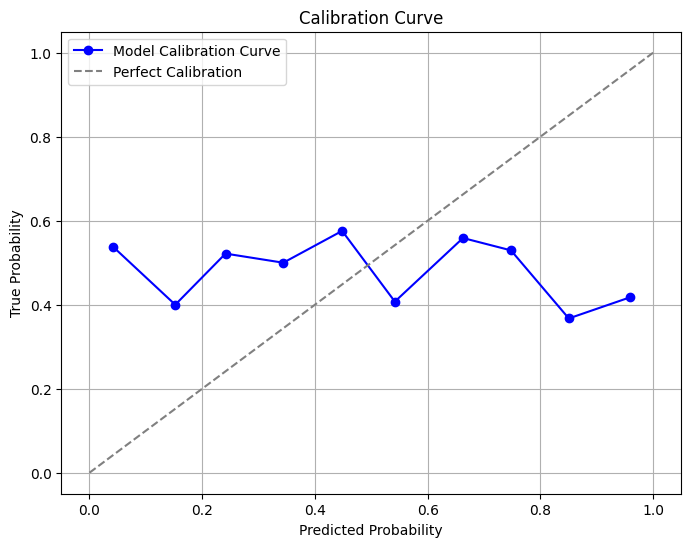

In [98]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
import numpy as np

# Asumsi: 
# y_train_actual = nilai aktual dari target pada dataset pelatihan
# y_train_pred_prob = probabilitas prediksi dari model pada dataset pelatihan

# Hitung calibration curve
prob_true, prob_pred = calibration_curve(y1_train, df_model1['predicted_prob'].to_list(), n_bins=10, strategy='uniform')

# Plot calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model Calibration Curve', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration', color='gray')

# Menambahkan informasi visual
plt.title('Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.legend()
plt.grid()
plt.show()


# Uji Bersarang antara dua model

In [99]:
lr_statistic = model1.deviance - model2.deviance # selisih 2 deviance
degree_of_freedom = X1_train_const.shape[1] - X2_train_const.shape[1]  # Derajat kebebasan (jumlah parameter tambahan)

# Menghitung p-value untuk uji LR
p_value = chi2.sf(lr_statistic, abs(degree_of_freedom))
print(f"LR Statistic: {lr_statistic}")
print(f"P-Value: {p_value}")

LR Statistic: -18896.038793975516
P-Value: 1.0


In [100]:
print(f"dengan LR Statistic: {lr_statistic}")
print(f"dan P-Value: {p_value}")
if p_value < 0.05:
    print(f"karena p_value < 0.05\nmaka model yang lebih kompleks lebih baik")
    #print(f"artinya model dengan interaksi antara Age dengan {kategorik} lebih baik")
else:
    print(f"karena p_value > 0.05\nmaka model yang lebih sederhana lebih baik")
    #print(f"artinya model tanpa interaksi antara Age dengan {kategorik} lebih baik")


dengan LR Statistic: -18896.038793975516
dan P-Value: 1.0
karena p_value > 0.05
maka model yang lebih sederhana lebih baik
